In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler

pd.set_option('display.max_columns', None)  # Show all columns on output

## Data validation

In [3]:
raw_df = pd.read_excel("data/raw_data.xlsx", sheet_name=0)

raw_df.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
149465,503606,22302,COFFEE MUG PEARS DESIGN,6,2010-04-06 09:56:00,2.55,17416.0,United Kingdom
240762,512694,22469,HEART OF WICKER SMALL,2,2010-06-17 11:52:00,1.65,14710.0,United Kingdom
337426,522286,22271,FELTCRAFT DOLL ROSIE,2,2010-09-13 13:42:00,2.95,14467.0,United Kingdom
265692,515093,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-07-08 11:33:00,2.95,16057.0,United Kingdom
216362,510414,20931,BLUE POT PLANT CANDLE,2,2010-05-30 11:02:00,3.75,15555.0,United Kingdom
436840,531138,22169,FAMILY ALBUM WHITE PICTURE FRAME,8,2010-11-05 14:09:00,7.65,13089.0,United Kingdom
68787,495501,85099B,JUMBO BAG RED WHITE SPOTTY,8,2010-01-25 12:33:00,1.95,15719.0,United Kingdom
513402,537237,22207,FRYING PAN UNION FLAG,3,2010-12-06 09:58:00,8.47,NaN,United Kingdom
487333,534886,90129F,RED GLASS TASSLE BAG CHARM,2,2010-11-24 14:49:00,2.95,NaN,Portugal
192814,507691,21593,SWALLOW CIGAR BOX MATCHES,2,2010-05-11 10:19:00,1.25,14395.0,United Kingdom


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
raw_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [6]:
raw_df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


**Notes**: 
* Customer ID has missing values
* Negative values are in Price and Quantity Column


In [7]:
df =raw_df.copy()

In [8]:
df.dropna(subset=['Customer ID'], inplace= True)  # Null Customer ID must be dropped
df = df[df['Quantity'] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407695 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  object        
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  float64       
 7   Country      407695 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.0+ MB


In [9]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,407695.000000,407695,407695.000000,407695.000000
mean,13.586686,2010-07-01 10:10:10.782177792,3.294188,15368.504107
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,13997.000000
50%,5.000000,2010-07-09 15:46:00,1.950000,15321.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16812.000000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000
std,96.842229,NaN,34.756655,1679.795700


In [10]:
df.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
78464,496512,84459B,YELLOW METAL CHICKEN HEART,4,2010-02-02 11:40:00,1.49,16300.0,United Kingdom
52940,494233,21354,TOAST ITS - BEST MUM,12,2010-01-12 14:33:00,1.25,15093.0,United Kingdom
61713,494871,21875,KINGS CHOICE MUG,36,2010-01-19 12:17:00,1.25,17706.0,United Kingdom
161134,504831,21925,UNION STRIPE CUSHION COVER,4,2010-04-16 13:35:00,1.25,17913.0,United Kingdom
344972,522987,20751,FUNKY WASHING UP GLOVES ASSORTED,1,2010-09-19 14:51:00,2.10,17625.0,United Kingdom
121400,500999,21889,WOODEN BOX OF DOMINOES,11,2010-03-11 13:46:00,1.25,16933.0,United Kingdom
178547,506295,22275,WEEKEND BAG VINTAGE ROSE PAISLEY,2,2010-04-29 10:17:00,8.50,15125.0,United Kingdom
150740,503774,85176,SEWING SUSAN 21 NEEDLE SET,1,2010-04-07 11:04:00,0.85,14606.0,United Kingdom
463744,533139,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,1,2010-11-16 13:03:00,3.75,17203.0,United Kingdom
370139,525105,22178,VICTORIAN GLASS HANGING T-LIGHT,12,2010-10-04 10:38:00,1.25,13441.0,United Kingdom


In [11]:
data_loss = (1 -len(df)/len(raw_df))*100
data_loss

22.411939230504263

### About 22.41% data is lost during data cleaning

## Feature Engineering

In [12]:
df["LineTotal"] = df["Quantity"] * df["Price"]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,LineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


### RFM analysis

In [13]:
rfm_df = df.groupby(by="Customer ID", as_index=False) \
    .agg(
        MonetaryValue=("LineTotal", "sum"),
        Frequency=("Invoice", "nunique"),
        LastInvoiceDate=("InvoiceDate", "max")
    )

rfm_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,372.86,11,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,222.16,1,2010-09-27 14:59:00
3,12349.0,2671.14,3,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


In [ ]:
max_invoice_date = rfm_df["LastInvoiceDate"].max() + pd.Timedelta(days=1) # pick the date after the last day of the data

rfm_df["Recency"] = (max_invoice_date - rfm_df["LastInvoiceDate"]).dt.days

rfm_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,372.86,11,2010-06-28 13:53:00,165
1,12347.0,1323.32,2,2010-12-07 14:57:00,3
2,12348.0,222.16,1,2010-09-27 14:59:00,74
3,12349.0,2671.14,3,2010-10-28 08:23:00,43
4,12351.0,300.93,1,2010-11-29 15:23:00,11


### Distribution check

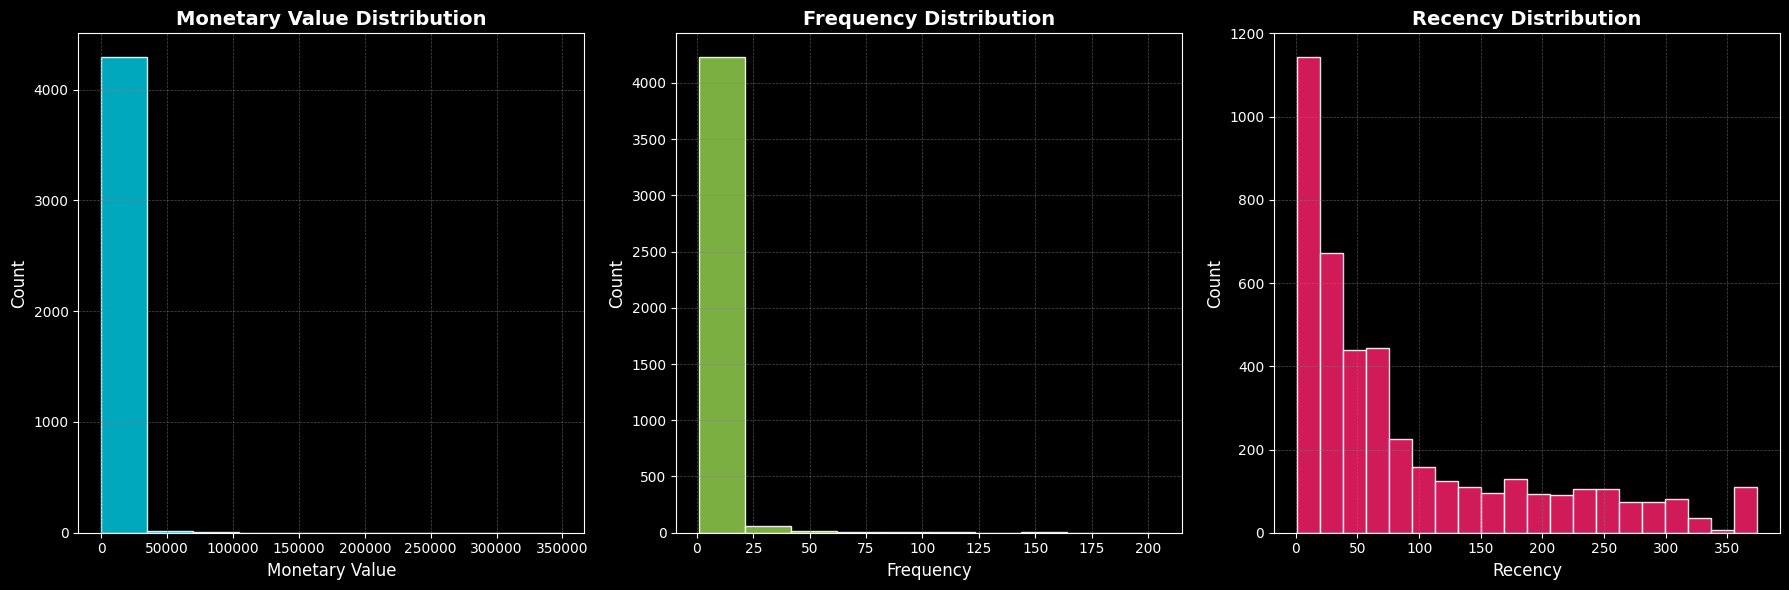

In [ ]:

plt.style.use('dark_background')
plt.figure(figsize=(18, 6))

# Monetary Value Distribution
plt.subplot(1, 3, 1)
plt.hist(rfm_df['MonetaryValue'], bins=10,
         color='#00bcd4', edgecolor='white', alpha=0.9)
plt.title('Monetary Value Distribution', fontsize=14,
          fontweight='bold', color='white')
plt.xlabel('Monetary Value', fontsize=12, color='white')
plt.ylabel('Count', fontsize=12, color='white')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Frequency Distribution
plt.subplot(1, 3, 2)
plt.hist(rfm_df['Frequency'], bins=10,
         color='#8bc34a', edgecolor='white', alpha=0.9)
plt.title('Frequency Distribution', fontsize=14,
          fontweight='bold', color='white')
plt.xlabel('Frequency', fontsize=12, color='white')
plt.ylabel('Count', fontsize=12, color='white')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Recency Distribution
plt.subplot(1, 3, 3)
plt.hist(rfm_df['Recency'], bins=20, color='#e91e63',
         edgecolor='white', alpha=0.9)
plt.title('Recency Distribution', fontsize=14,
          fontweight='bold', color='white')
plt.xlabel('Recency', fontsize=12, color='white')
plt.ylabel('Count', fontsize=12, color='white')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

plt.tight_layout()
plt.show()

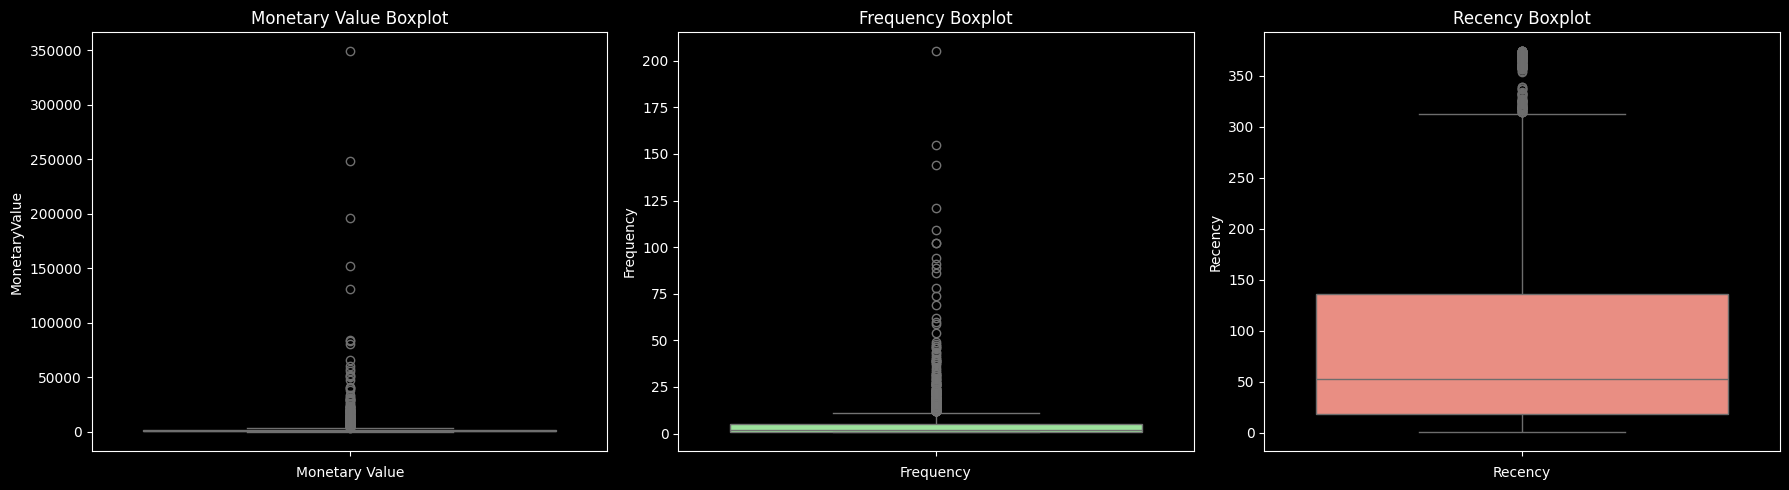

In [ ]:
plt.figure(figsize=(18, 5))

# Monetary Value Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(data=rfm_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

# Frequency Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(data=rfm_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

# SRecency Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(data=rfm_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

### Outlier removal

**Note:** We'll analysis outlier portion different, they are useful for our analysis

In [17]:
MV_Q1 = rfm_df["MonetaryValue"].quantile(0.25)
MV_Q3 = rfm_df["MonetaryValue"].quantile(0.75)
MV_IQR = MV_Q3 - MV_Q1

monetary_outliers_df = rfm_df[(rfm_df["MonetaryValue"] > (MV_Q3 + 1.5 * MV_IQR)) | (rfm_df["MonetaryValue"] < (MV_Q1 - 1.5 * MV_IQR))].copy()

monetary_outliers_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
9,12357.0,12079.99,2,2010-11-16 14:29:00,24
26,12380.0,6951.49,7,2010-08-31 14:54:00,101
44,12409.0,12346.62,4,2010-10-15 10:24:00,56
50,12415.0,19543.84,7,2010-11-29 15:07:00,11
56,12422.0,4428.24,14,2010-11-10 13:19:00,30
63,12431.0,4370.52,13,2010-12-01 10:03:00,9
64,12433.0,7205.39,5,2010-12-08 16:49:00,2
66,12435.0,6096.04,4,2010-11-08 10:07:00,32
67,12437.0,7731.99,21,2010-11-09 14:46:00,31
76,12454.0,13151.44,4,2010-11-09 10:09:00,31


In [18]:
FQ_Q1 = rfm_df['Frequency'].quantile(0.25)
FQ_Q3 = rfm_df['Frequency'].quantile(0.75)
FQ_IQR = FQ_Q3 - FQ_Q1

frequency_outliers_df = rfm_df[(rfm_df['Frequency'] > (FQ_Q3 + 1.5 * FQ_IQR)) | (rfm_df['Frequency'] < (FQ_Q1 - 1.5 * FQ_IQR))].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,285.000000,285.000000,285.000000,285,285.000000
mean,15307.796491,14374.576372,23.908772,2010-11-23 13:55:24.631578880,16.971930
min,12422.000000,1094.390000,12.000000,2010-05-12 16:51:00,1.000000
25%,13715.000000,4331.410000,13.000000,2010-11-19 15:51:00,3.000000
50%,15311.000000,6507.670000,17.000000,2010-12-02 08:52:00,8.000000
75%,16814.000000,11645.700000,23.000000,2010-12-07 10:08:00,21.000000
max,18260.000000,349164.350000,205.000000,2010-12-09 19:32:00,212.000000
std,1773.255926,31518.798551,22.833570,NaN,25.778429


In [19]:
non_outliers_df = rfm_df[(~rfm_df.index.isin(monetary_outliers_df.index)) & (~rfm_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3830.000000,3830.000000,3830.000000,3830,3830.000000
mean,15372.263969,889.399422,2.863446,2010-09-02 12:56:34.010443776,99.013316
min,12346.000000,0.000000,1.000000,2009-12-01 09:55:00,1.000000
25%,13911.250000,280.922500,1.000000,2010-07-07 10:15:00,23.000000
50%,15379.500000,588.625000,2.000000,2010-10-12 12:31:00,59.000000
75%,16845.750000,1273.302500,4.000000,2010-11-17 13:07:45,156.000000
max,18287.000000,3817.180000,11.000000,2010-12-09 20:01:00,374.000000
std,1693.003054,824.842965,2.241468,NaN,98.824058


### Distribution after outlier removal

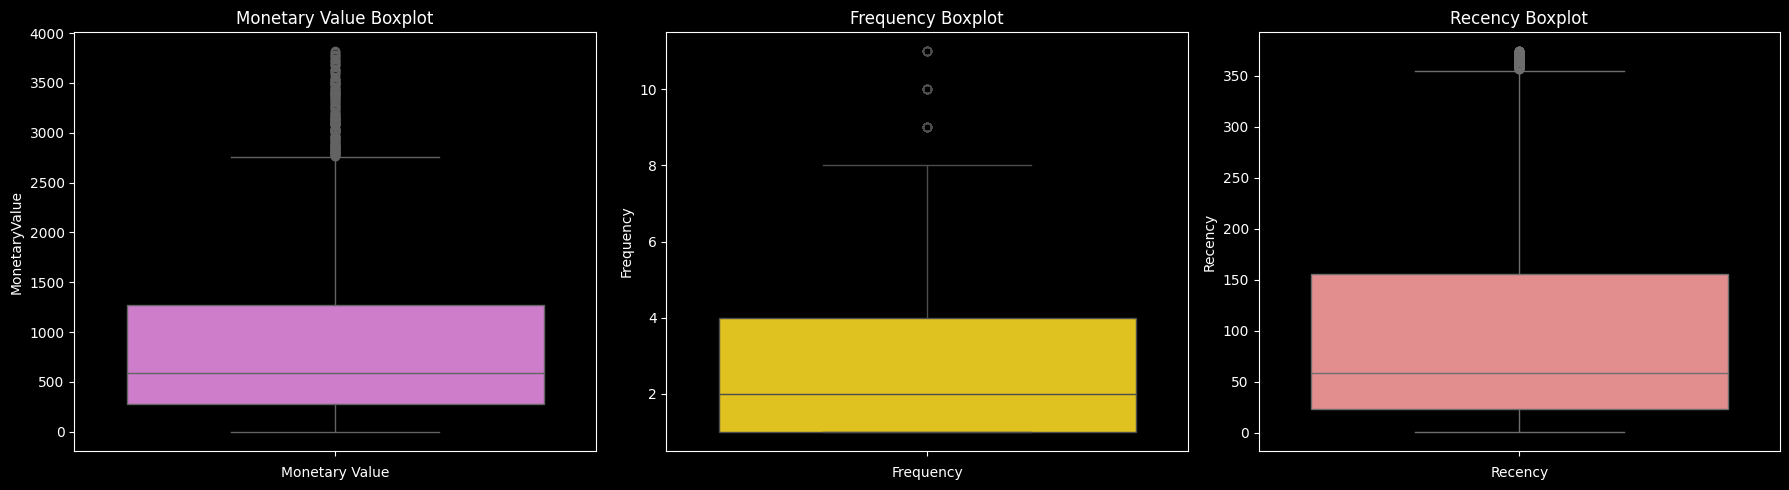

In [ ]:
plt.figure(figsize=(18, 5))

# Boxplot for MonetaryValue
plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'],
            color='orchid')  # Changed color to orchid
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

# Boxplot for Frequency
plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'],
            color='gold')  # Changed color to gold
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

# Boxplot for frequency
plt.subplot(1, 3, 3)
# Changed color to lightcoral
sns.boxplot(data=non_outliers_df['Recency'], color='lightcoral')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

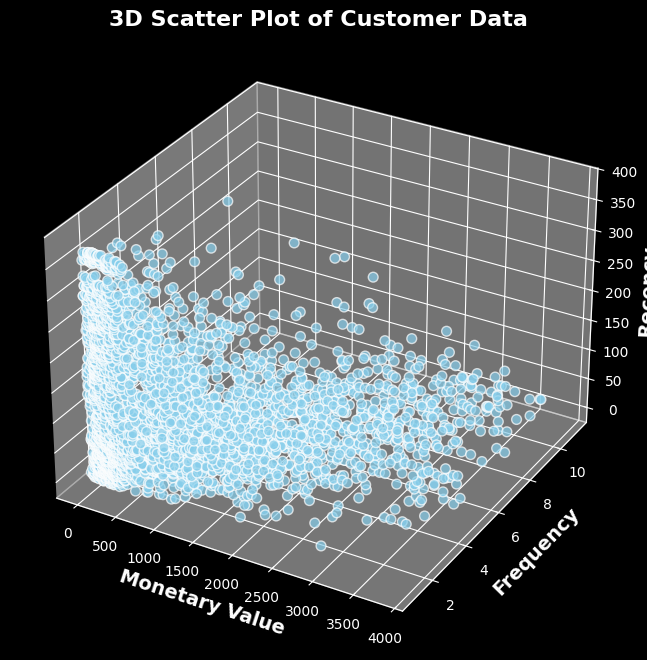

In [ ]:
fig = plt.figure(figsize=(16, 8))

# 3D Scatter plot
ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(
    non_outliers_df["MonetaryValue"],
    non_outliers_df["Frequency"],
    non_outliers_df["Recency"],
    c='skyblue',  
    s=50, 
    edgecolors='w',  
    alpha=0.7 
)

ax.set_xlabel('Monetary Value', fontsize=14, fontweight='bold', color='white')
ax.set_ylabel('Frequency', fontsize=14, fontweight='bold', color='white')
ax.set_zlabel('Recency', fontsize=14, fontweight='bold', color='white')

ax.set_title('3D Scatter Plot of Customer Data',
             fontsize=16, fontweight='bold', color='white')

ax.set_facecolor('black')  
fig.patch.set_facecolor('black')  

# Display the plot
plt.show()

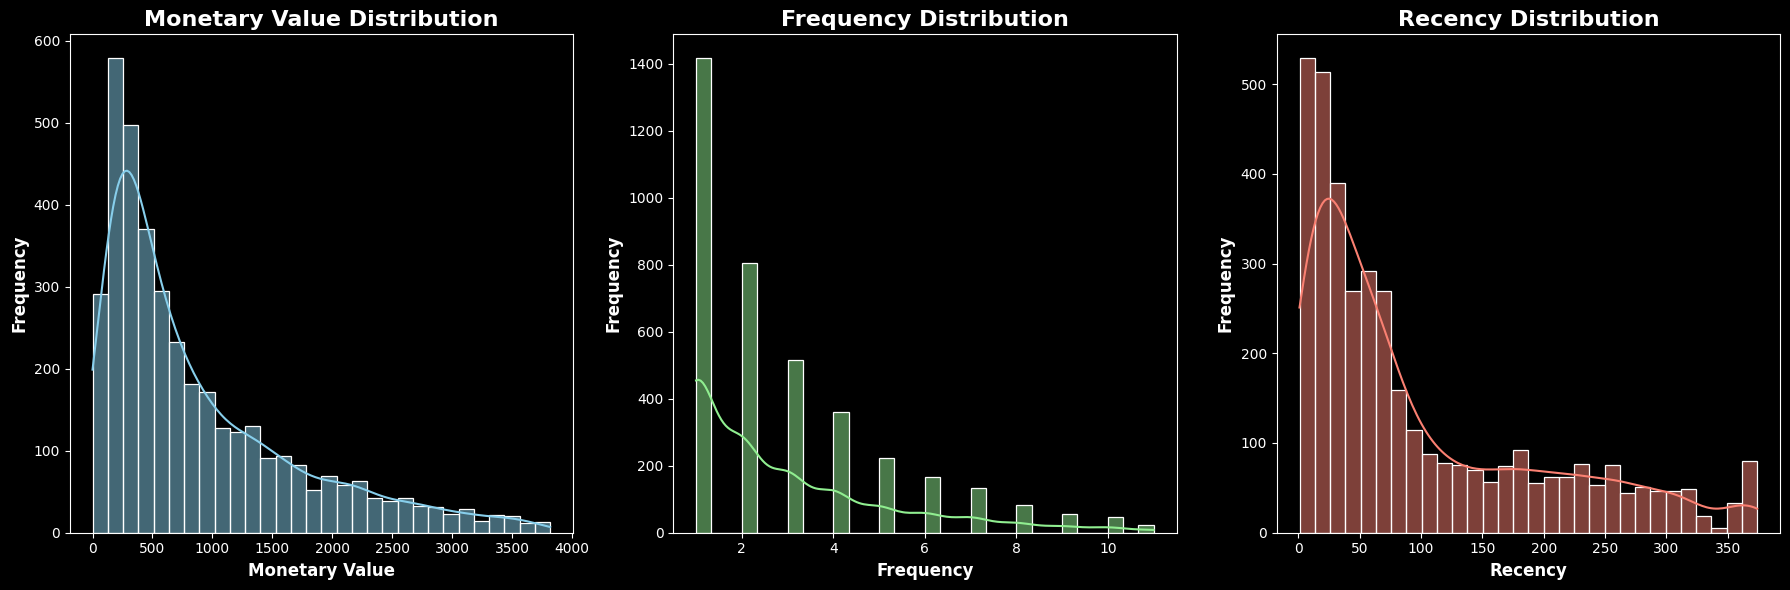

In [ ]:
plt.figure(figsize=(18, 6))

# Plot distribution of 'MonetaryValue'
plt.subplot(1, 3, 1)
sns.histplot(non_outliers_df['MonetaryValue'],
             kde=True, color='skyblue', bins=30)
plt.title('Monetary Value Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Monetary Value', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')

# Plot distribution of 'Frequency'
plt.subplot(1, 3, 2)
sns.histplot(non_outliers_df['Frequency'],
             kde=True, color='lightgreen', bins=30)
plt.title('Frequency Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')

# Plot distribution of 'Recency'
plt.subplot(1, 3, 3)
sns.histplot(non_outliers_df['Recency'], kde=True, color='salmon', bins=30)
plt.title('Recency Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Recency', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### Scaling

In [ ]:
robust_scaler = RobustScaler()
scaled_data = robust_scaler.fit_transform(
    non_outliers_df[["MonetaryValue", "Frequency", "Recency"]]) 
scaled_data

array([[-0.21742175,  3.        ,  0.79699248],
       [ 0.74033636,  0.        , -0.42105263],
       [-0.36927891, -0.33333333,  0.11278195],
       ...,
       [-0.16286604, -0.33333333,  1.78195489],
       [ 0.71323989,  0.        ,  0.39849624],
       [ 1.7705768 ,  0.66666667, -0.30827068]], shape=(3830, 3))

In [71]:
scaled_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

scaled_df

,MonetaryValue,Frequency,Recency
0,-0.217422,3.000000,0.796992
1,0.740336,0.000000,-0.421053
2,-0.369279,-0.333333,0.112782
3,2.098506,0.333333,-0.120301
4,-0.289904,-0.333333,-0.360902
...,...,...,...
4309,0.053553,1.333333,-0.308271
4310,-0.127920,-0.333333,0.060150
4311,-0.162866,-0.333333,1.781955
4312,0.713240,0.000000,0.398496


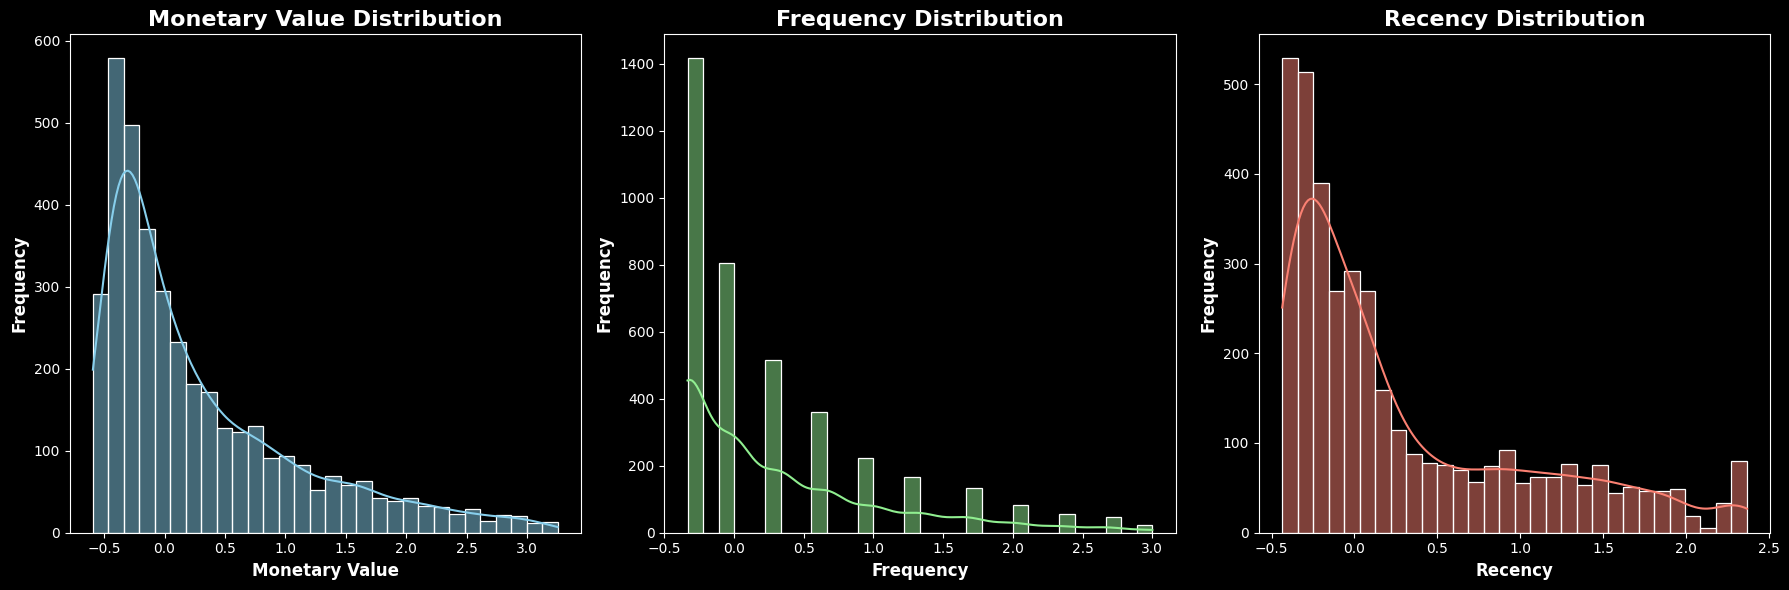

In [ ]:
plt.figure(figsize=(18, 6))

# Plot distribution of 'MonetaryValue'
plt.subplot(1, 3, 1)
sns.histplot(scaled_df['MonetaryValue'],
             kde=True, color='skyblue', bins=30)
plt.title('Monetary Value Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Monetary Value', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')

# Plot distribution of 'Frequency'
plt.subplot(1, 3, 2)
sns.histplot(scaled_df['Frequency'],
             kde=True, color='lightgreen', bins=30)
plt.title('Frequency Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')

# Plot distribution of 'Recency'
plt.subplot(1, 3, 3)
sns.histplot(scaled_df['Recency'], kde=True, color='salmon', bins=30)
plt.title('Recency Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Recency', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

## KMeans Clustering

In [84]:
max_k = 8

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=2000)

    cluster_labels = kmeans.fit_predict(scaled_df)

    sil_score = silhouette_score(scaled_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)



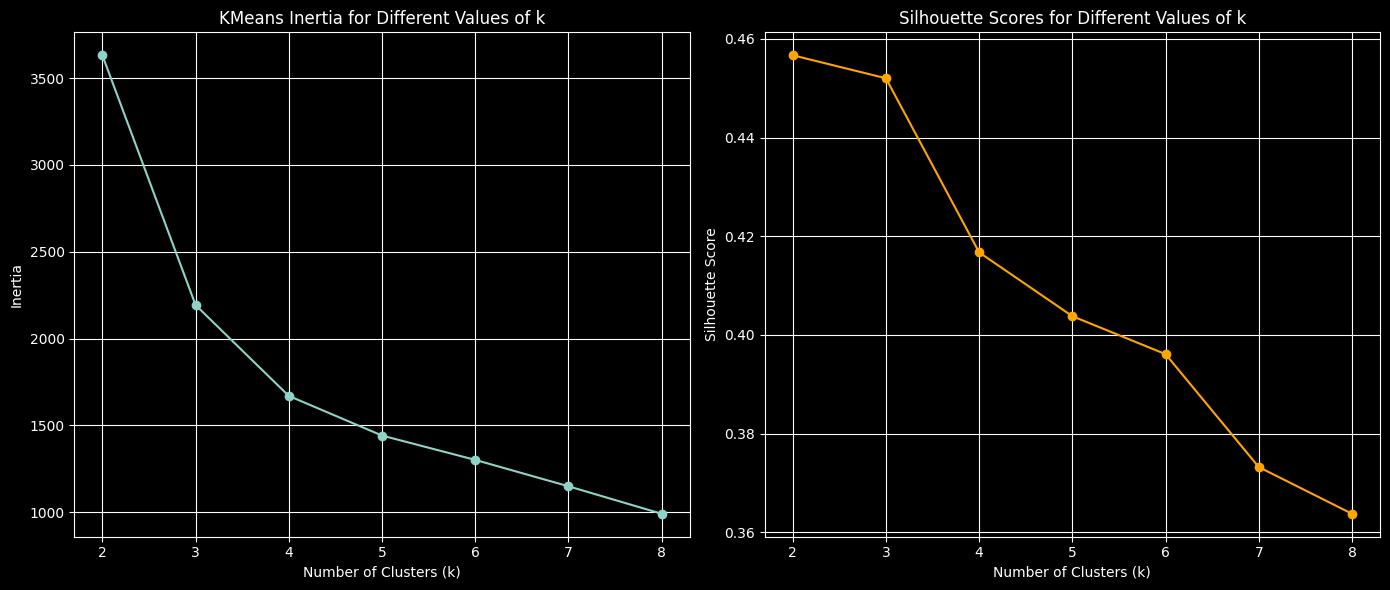

In [85]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [86]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=2000)

cluster_labels = kmeans.fit_predict(scaled_df)

cluster_labels

array([1, 1, 3, ..., 0, 1, 2], shape=(3830,), dtype=int32)

In [87]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

C:\Users\Rakin\AppData\Local\Temp\ipykernel_23564\3577770544.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,372.86,11,2010-06-28 13:53:00,165,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,3,1
2,12348.0,222.16,1,2010-09-27 14:59:00,74,3
3,12349.0,2671.14,3,2010-10-28 08:23:00,43,2
4,12351.0,300.93,1,2010-11-29 15:23:00,11,3
...,...,...,...,...,...,...
4309,18283.0,641.77,6,2010-11-22 15:30:00,18,1
4310,18284.0,461.68,1,2010-10-04 11:33:00,67,3
4311,18285.0,427.00,1,2010-02-17 10:24:00,296,0
4312,18286.0,1296.43,2,2010-08-20 11:57:00,112,1


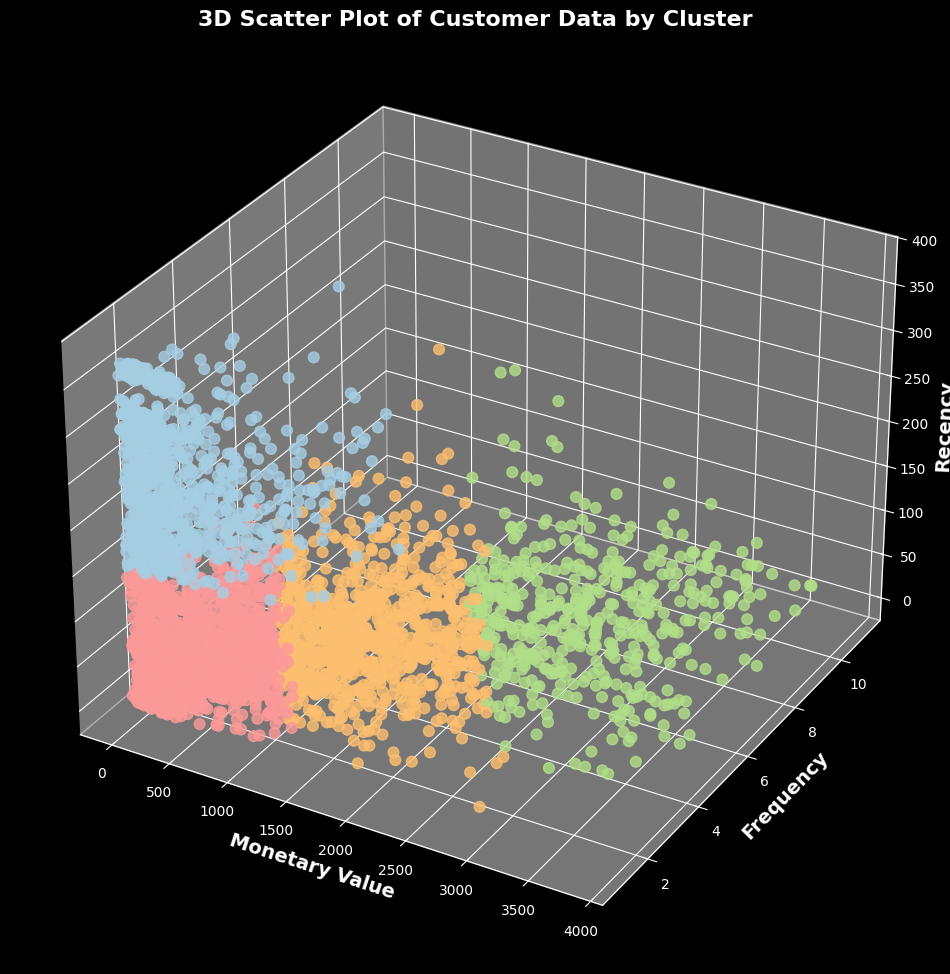

In [112]:
cluster_colors = {0: '#a6cee3', 1: '#fdbf6f', 2: '#b2df8a', 3: '#fb9a99'}

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(12, 16))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'],
                     non_outliers_df['Frequency'],
                     non_outliers_df['Recency'],
                     c=colors,
                     alpha=0.8,
                     s=60)

ax.set_xlabel('Monetary Value', fontsize=14, weight='bold')
ax.set_ylabel('Frequency', fontsize=14, weight='bold')
ax.set_zlabel('Recency', fontsize=14, weight='bold')

ax.set_title('3D Scatter Plot of Customer Data by Cluster',
             fontsize=16, weight='bold')

plt.show()

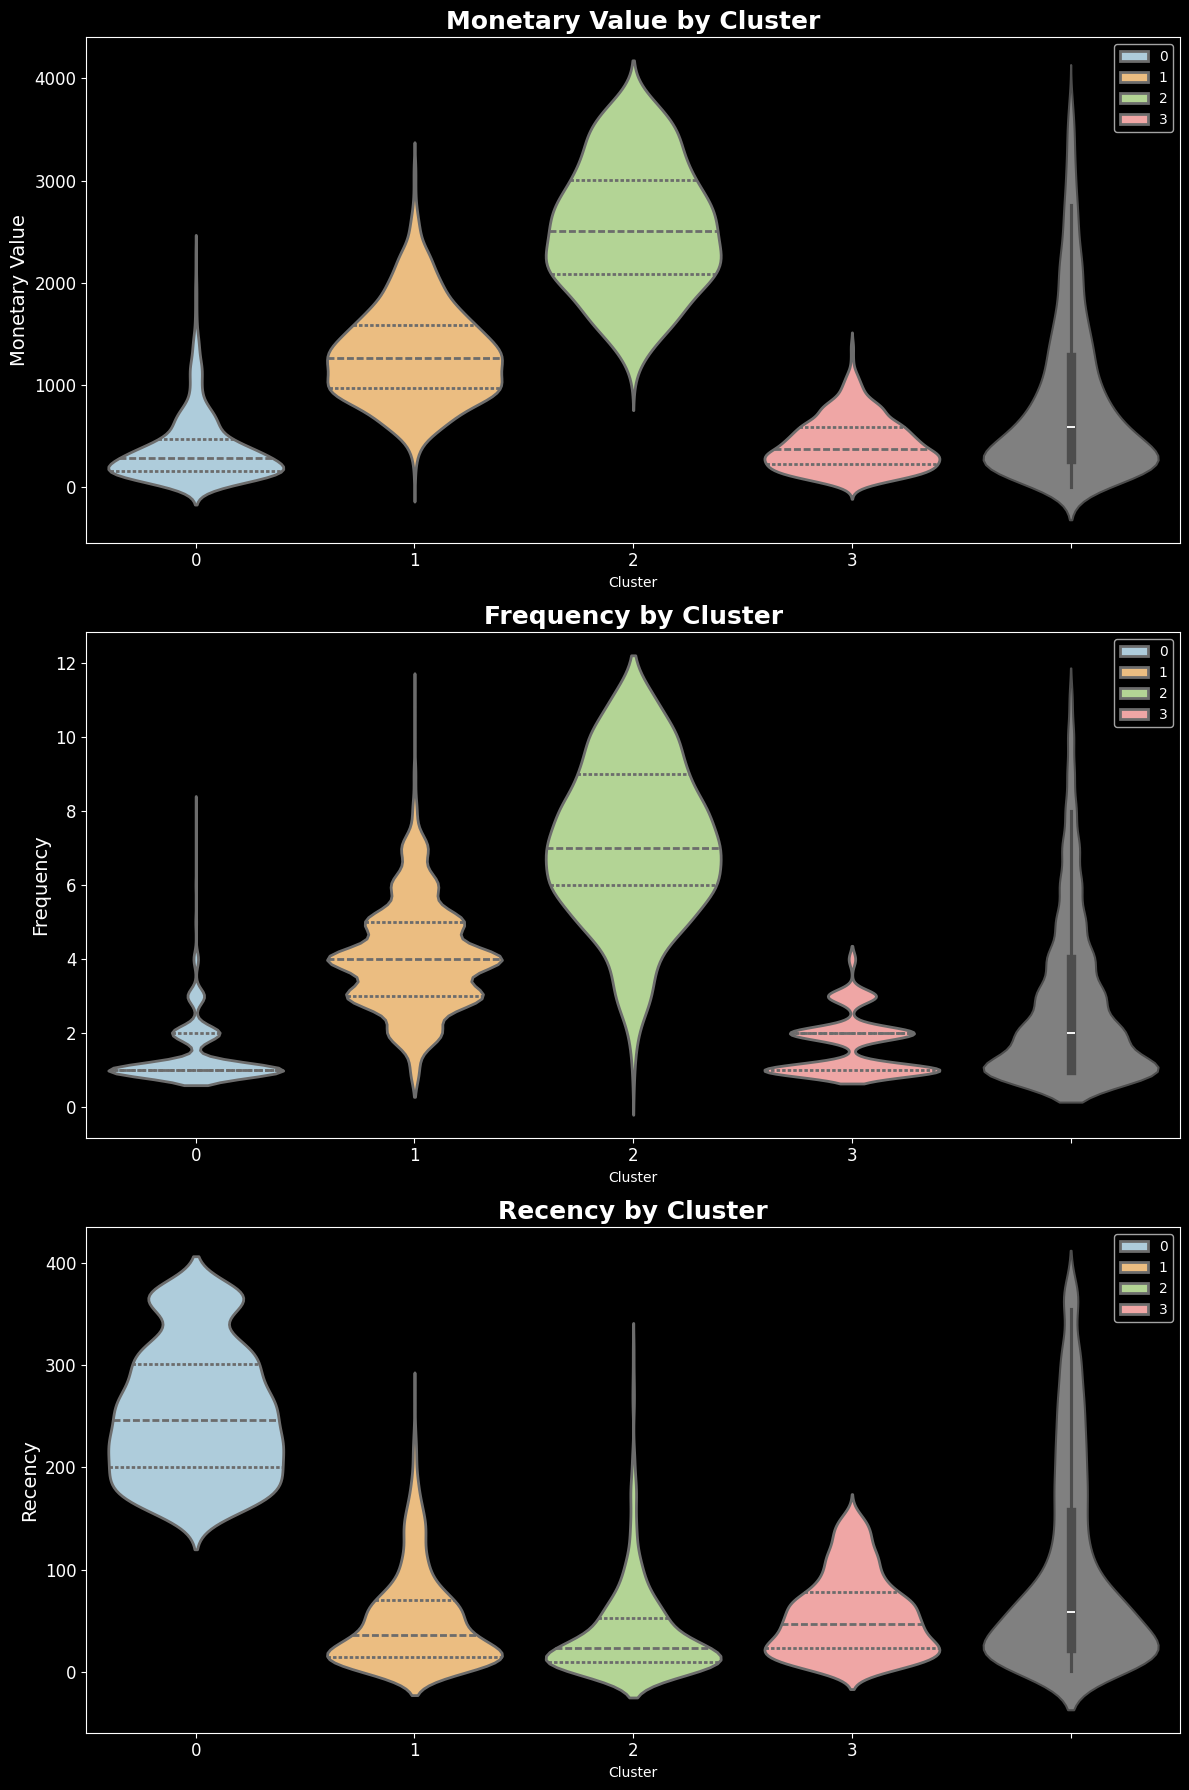

In [113]:
plt.figure(figsize=(12, 18))

# Violin plot for Monetary Value by Cluster
plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'],
               palette=cluster_colors, hue=non_outliers_df["Cluster"], inner="quart", linewidth=2)
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.5)
plt.title('Monetary Value by Cluster', fontsize=18, weight='bold')
plt.ylabel('Monetary Value', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Violin plot for Frequency by Cluster
plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'],
               palette=cluster_colors, hue=non_outliers_df["Cluster"], inner="quart", linewidth=2)
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.5)
plt.title('Frequency by Cluster', fontsize=18, weight='bold')
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Violin plot for Recency by Cluster
plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'],
               palette=cluster_colors, hue=non_outliers_df["Cluster"], inner="quart", linewidth=2)
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.5)
plt.title('Recency by Cluster', fontsize=18, weight='bold')
plt.ylabel('Recency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### Cluster Analysis and Recommendations

1. **Cluster 0**:  
   - **Description**: Lower-value, infrequent buyers who haven't purchased recently.  
   - **Action**:  
     - Use targeted marketing campaigns.  
     - Offer special discounts or reminders to encourage them to return and purchase again.

2. **Cluster 1**:  
   - **Description**: Higher-value, regular buyers but not active recently.  
   - **Action**:  
     - Implement loyalty programs.  
     - Provide personalized deals to re-engage them.

3. **Cluster 2**:  
   - **Description**: Higher-value, very frequent buyers, many of whom are still actively purchasing.  
   - **Action**:  
     - Offer exclusive deals and promotions.  
     - Enhance loyalty programs to maintain their engagement.

4. **Cluster 3**:  
   - **Description**: Lower-value, infrequent buyers but recent purchasers.  
   - **Action**:  
     - Implement retention strategies.  
     - Provide better customer service.  
     - Offer incentives to encourage more frequent purchases.


In [114]:
monetary_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
9,12357.0,12079.99,2,2010-11-16 14:29:00,24
26,12380.0,6951.49,7,2010-08-31 14:54:00,101
44,12409.0,12346.62,4,2010-10-15 10:24:00,56
50,12415.0,19543.84,7,2010-11-29 15:07:00,11
56,12422.0,4428.24,14,2010-11-10 13:19:00,30
...,...,...,...,...,...
4265,18225.0,7545.14,15,2010-12-09 15:46:00,1
4266,18226.0,6650.83,15,2010-11-26 15:51:00,14
4270,18231.0,4797.70,23,2010-10-29 14:17:00,42
4282,18251.0,21964.14,8,2010-09-20 13:26:00,81


In [115]:
frequency_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
56,12422.0,4428.24,14,2010-11-10 13:19:00,30
63,12431.0,4370.52,13,2010-12-01 10:03:00,9
67,12437.0,7731.99,21,2010-11-09 14:46:00,31
87,12471.0,20139.74,49,2010-11-30 14:35:00,10
88,12472.0,11308.48,13,2010-12-05 14:19:00,5
...,...,...,...,...,...
4265,18225.0,7545.14,15,2010-12-09 15:46:00,1
4266,18226.0,6650.83,15,2010-11-26 15:51:00,14
4270,18231.0,4797.70,23,2010-10-29 14:17:00,42
4279,18245.0,3757.92,13,2010-11-25 16:52:00,15


# Dealing with outliers

In [120]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = 4
frequency_only_outliers["Cluster"] = 5
monetary_and_frequency_outliers["Cluster"] = 6

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.0,12079.99,2,2010-11-16 14:29:00,24,4
26,12380.0,6951.49,7,2010-08-31 14:54:00,101,4
44,12409.0,12346.62,4,2010-10-15 10:24:00,56,4
50,12415.0,19543.84,7,2010-11-29 15:07:00,11,4
64,12433.0,7205.39,5,2010-12-08 16:49:00,2,4
...,...,...,...,...,...,...
4264,18223.0,7516.31,12,2010-11-17 12:20:00,23,6
4265,18225.0,7545.14,15,2010-12-09 15:46:00,1,6
4266,18226.0,6650.83,15,2010-11-26 15:51:00,14,6
4270,18231.0,4797.70,23,2010-10-29 14:17:00,42,6


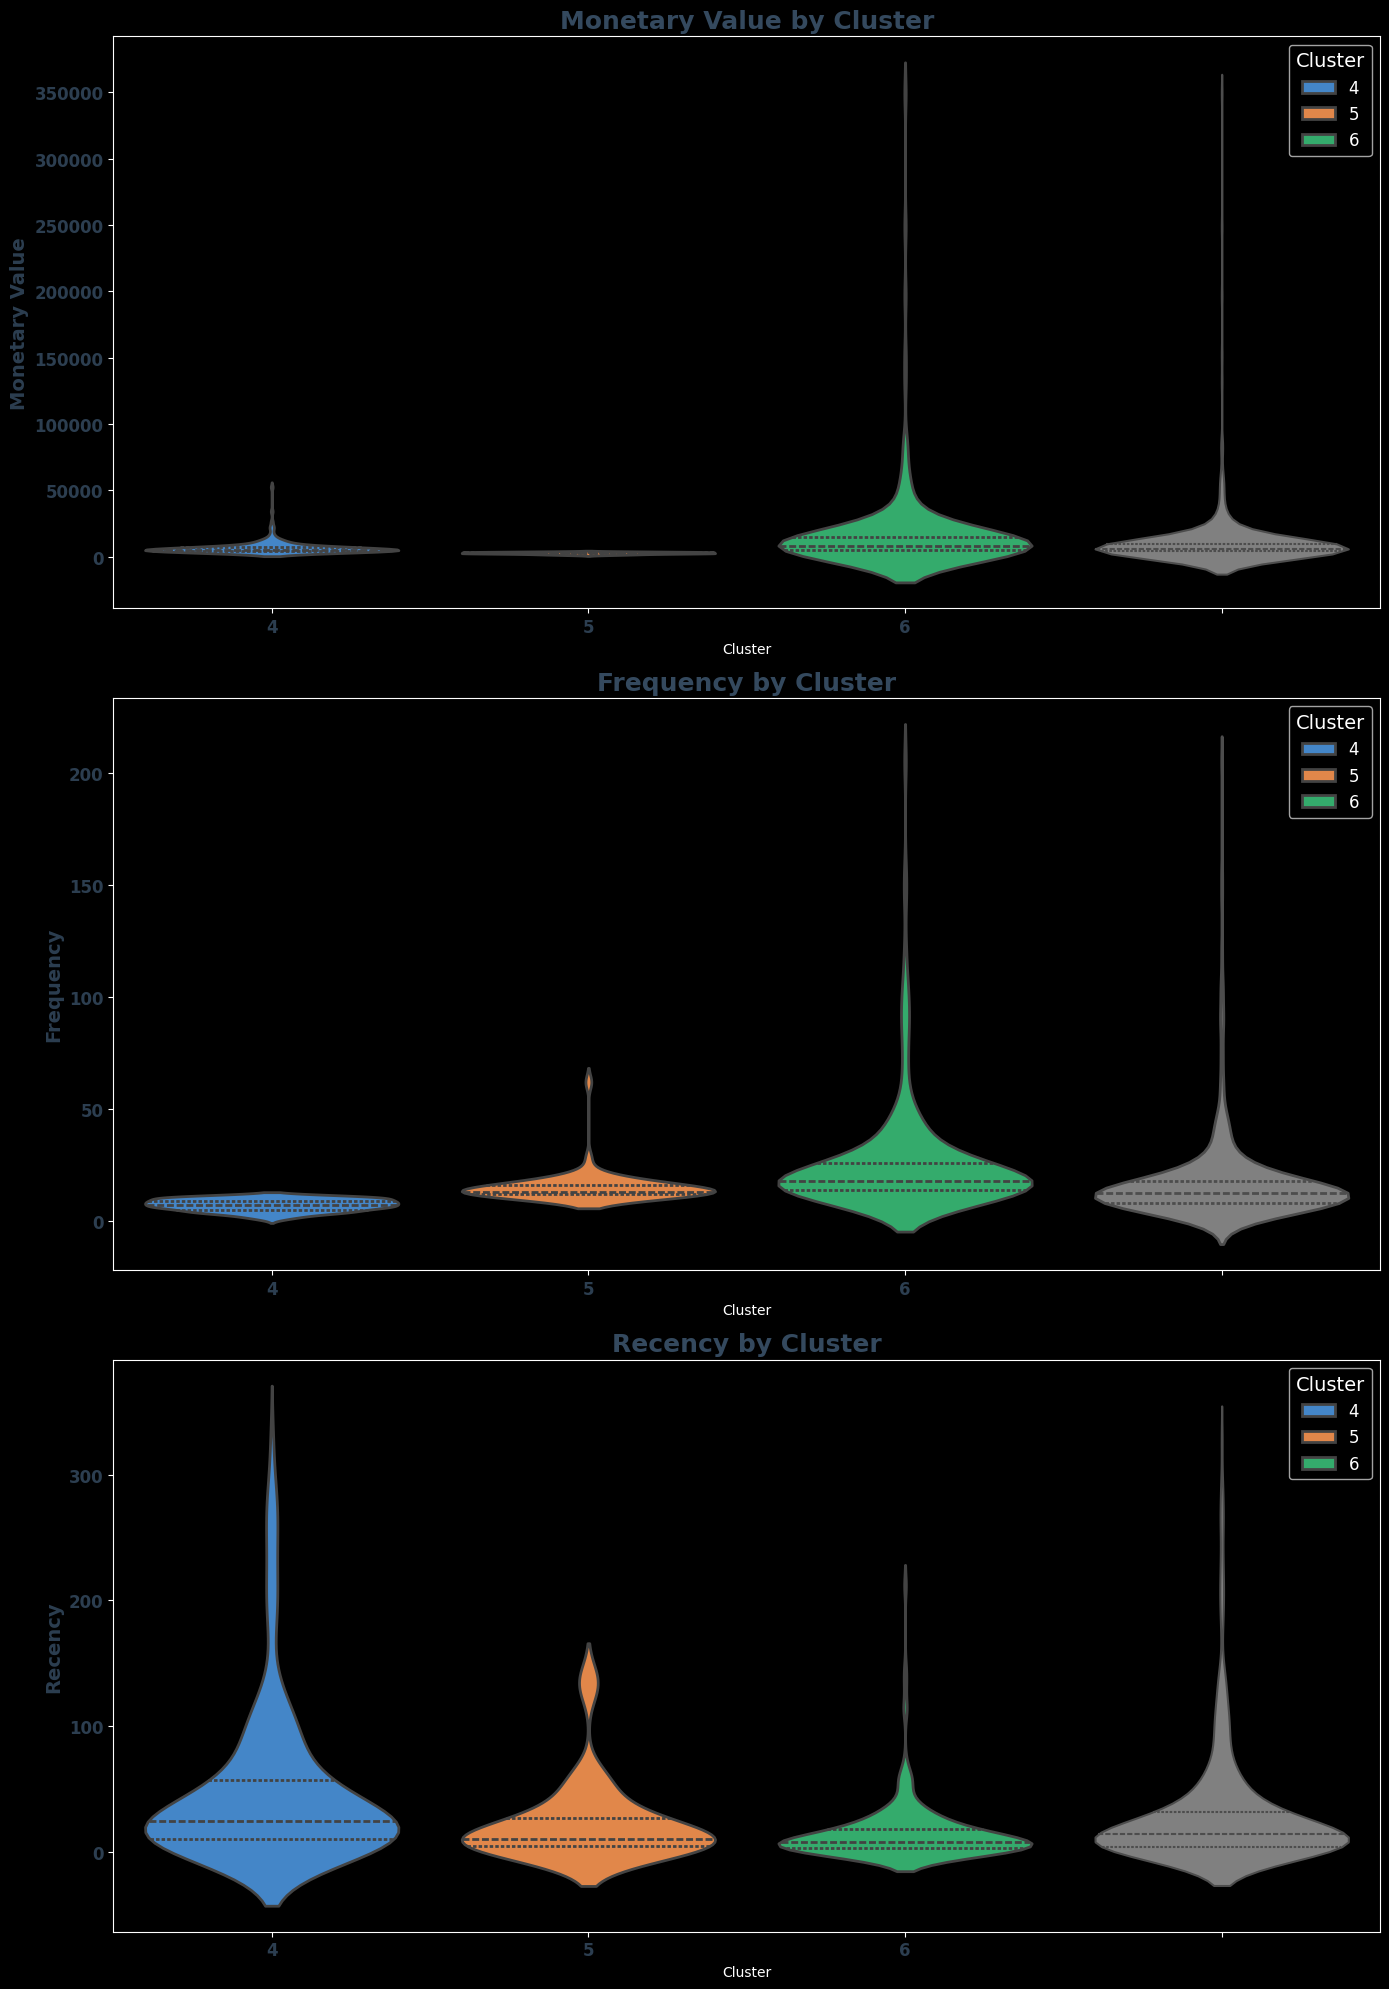

In [127]:
cluster_colors = {
    4: '#2e86de',  
    5: '#fa8231',
    6: '#20bf6b'   
}

plt.figure(figsize=(14, 20))

# Monetary Value by Cluster
plt.subplot(3, 1, 1)
sns.violinplot(
    x=outlier_clusters_df['Cluster'],
    y=outlier_clusters_df['MonetaryValue'],
    palette=cluster_colors,
    hue=outlier_clusters_df['Cluster'],
    inner="quart",
    linewidth=2,
)
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.5, inner='quart')
plt.title('Monetary Value by Cluster', fontsize=18,
          weight='bold', color="#34495e")
plt.ylabel('Monetary Value', fontsize=14, weight='bold', color="#2c3e50")
plt.xticks(fontsize=12, weight='bold', color="#2c3e50")
plt.yticks(fontsize=12, weight='bold', color="#2c3e50")
plt.legend(title='Cluster', fontsize=12, title_fontsize=14)

# Frequency by Cluster 
plt.subplot(3, 1, 2)
sns.violinplot(
    x=outlier_clusters_df['Cluster'],
    y=outlier_clusters_df['Frequency'],
    palette=cluster_colors,
    hue=outlier_clusters_df['Cluster'],
    inner="quart",
    linewidth=2,
)
sns.violinplot(y=outlier_clusters_df['Frequency'],
               color='gray', linewidth=2, inner='quart')

plt.title('Frequency by Cluster', fontsize=18, weight='bold', color="#34495e")
plt.ylabel('Frequency', fontsize=14, weight='bold', color="#2c3e50")
plt.xticks(fontsize=12, weight='bold', color="#2c3e50")
plt.yticks(fontsize=12, weight='bold', color="#2c3e50")
plt.legend(title='Cluster', fontsize=12, title_fontsize=14)

# Recency by Cluster 
plt.subplot(3, 1, 3)
sns.violinplot(
    x=outlier_clusters_df['Cluster'],
    y=outlier_clusters_df['Recency'],
    palette=cluster_colors,
    hue=outlier_clusters_df['Cluster'],
    inner="quart",
    linewidth=2,
)
sns.violinplot(y=outlier_clusters_df['Recency'],
               color='gray', linewidth=1.5, inner='quart')

plt.title('Recency by Cluster', fontsize=18, weight='bold', color="#34495e")
plt.ylabel('Recency', fontsize=14, weight='bold', color="#2c3e50")
plt.xticks(fontsize=12, weight='bold', color="#2c3e50")
plt.yticks(fontsize=12, weight='bold', color="#2c3e50")
plt.legend(title='Cluster', fontsize=12, title_fontsize=14)

plt.tight_layout()
plt.show()

1. **Cluster 4**:  
   - **Description**: High spenders with infrequent purchases.  
   - **Action**:  
     - Provide personalized offers and luxury services.  
     - Focus on maintaining loyalty through tailored experiences.  

2. **Cluster 5**:  
   - **Description**: Frequent buyers with lower spending per purchase.  
   - **Action**:  
     - Introduce bundle deals and upselling strategies.  
     - Implement loyalty programs to encourage higher spending.  

3. **Cluster 6**:  
   - **Description**: Top-tier customers with extreme spending and frequent purchases.  
   - **Action**:  
     - Develop VIP programs and exclusive offers.  
     - Provide premium experiences to maintain their engagement and loyalty.  

In [128]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,372.86,11,2010-06-28 13:53:00,165,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,3,1
2,12348.0,222.16,1,2010-09-27 14:59:00,74,3
3,12349.0,2671.14,3,2010-10-28 08:23:00,43,2
4,12351.0,300.93,1,2010-11-29 15:23:00,11,3
...,...,...,...,...,...,...
4264,18223.0,7516.31,12,2010-11-17 12:20:00,23,6
4265,18225.0,7545.14,15,2010-12-09 15:46:00,1,6
4266,18226.0,6650.83,15,2010-11-26 15:51:00,14,6
4270,18231.0,4797.70,23,2010-10-29 14:17:00,42,6


## Final Visualisation & summary


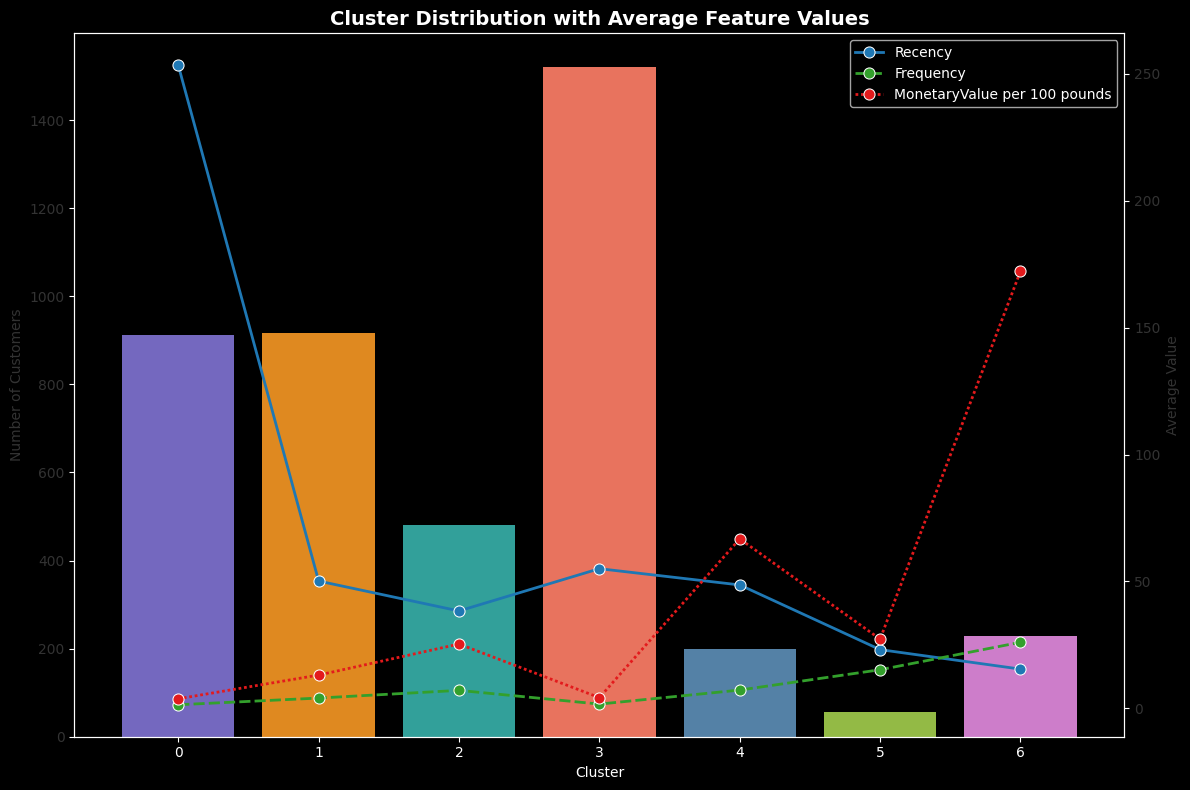

In [134]:
cluster_counts = full_clustering_df['Cluster'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby(
    'Cluster')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette=[
            '#6A5ACD', '#FF8C00', '#20B2AA', '#FF6347', '#4682B4', '#9ACD32', '#DA70D6'], hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='#333333')
ax1.set_title('Cluster Distribution with Average Feature Values',
              fontsize=14, weight='bold')
ax1.tick_params(axis='y', labelcolor='#333333')
ax1.legend_.remove()

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette=[
             '#1F78B4', '#33A02C', '#E31A1C'], marker='o', linewidth=2, markersize=8)
ax2.set_ylabel('Average Value', color='#333333')
ax2.tick_params(axis='y', labelcolor='#333333')

plt.tight_layout()
plt.show()

### Cluster Analysis and Recommendations

1. **Cluster 0**:  
   - **Description**: Lower-value, infrequent buyers who haven't purchased recently.  
   - **Action**:  
     - Use targeted marketing campaigns.  
     - Offer special discounts or reminders to encourage them to return and purchase again.

2. **Cluster 1**:  
   - **Description**: Higher-value, regular buyers but not active recently.  
   - **Action**:  
     - Implement loyalty programs.  
     - Provide personalized deals to re-engage them.

3. **Cluster 2**:  
   - **Description**: Higher-value, very frequent buyers, many of whom are still actively purchasing.  
   - **Action**:  
     - Offer exclusive deals and promotions.  
     - Enhance loyalty programs to maintain their engagement.

4. **Cluster 3**:  
   - **Description**: Lower-value, infrequent buyers but recent purchasers.  
   - **Action**:  
     - Implement retention strategies.  
     - Provide better customer service.  
     - Offer incentives to encourage more frequent purchases.

1. **Cluster 4**:  
   - **Description**: High spenders with infrequent purchases.  
   - **Action**:  
     - Provide personalized offers and luxury services.  
     - Focus on maintaining loyalty through tailored experiences.  

2. **Cluster 5**:  
   - **Description**: Frequent buyers with lower spending per purchase.  
   - **Action**:  
     - Introduce bundle deals and upselling strategies.  
     - Implement loyalty programs to encourage higher spending.  

3. **Cluster 6**:  
   - **Description**: Top-tier customers with extreme spending and frequent purchases.  
   - **Action**:  
     - Develop VIP programs and exclusive offers.  
     - Provide premium experiences to maintain their engagement and loyalty.  

# Store all the clusters in csv for ease of use

In [ ]:
# for i in range(0,7):
#   full_clustering_df[full_clustering_df['Cluster'] == i].to_csv(f'Results/cluster{i}.csv')

In [137]:
# full_clustering_df.to_csv('Results/full_cluster_df.csv')